# DATA 602
## Farhod Ibragimov

<a href="https://colab.research.google.com/github/data602sps/assignments/blob/master/05_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**

# **Weeks 10 & 11- matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section.


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  


### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

•	https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

•	https://www.data-to-viz.com/



### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include:

* Summary statistics means, medians, quartiles,
* Missing value information
* Any other relevant information about the dataset.  



In [25]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

loading the real estate dataset with sales info from 2001–2023. i’ll explore and visualize patterns in property prices

In [26]:
# loading data
real_estate_df = pd.read_csv(r"https://huggingface.co/datasets/glavvrach79/real_estate/resolve/main/Real_Estate_Sales_2001-2023_GL%20(1).csv", low_memory=False)

In [27]:
# 1st 5 rows of dataset
real_estate_df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463,Commercial,NaN,NaN,NaN,NaN,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN,NaN,NaN
4,210288,2021,06/20/2022,Avon,12 BYRON DRIVE,179990.0,362500.0,0.4965,Residential,Condo,NaN,NaN,NaN,POINT (-72.879115982 41.773452988)


i always check info() to see data types, non-null counts, and missing values — helps plan cleaning steps

In [28]:
# info to understand data types and missing values
real_estate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141722 entries, 0 to 1141721
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1141722 non-null  int64  
 1   List Year         1141722 non-null  int64  
 2   Date Recorded     1141720 non-null  object 
 3   Town              1141722 non-null  object 
 4   Address           1141671 non-null  object 
 5   Assessed Value    1141722 non-null  float64
 6   Sale Amount       1141722 non-null  float64
 7   Sales Ratio       1141722 non-null  object 
 8   Property Type     759276 non-null   object 
 9   Residential Type  738804 non-null   object 
 10  Non Use Code      324807 non-null   object 
 11  Assessor Remarks  181090 non-null   object 
 12  OPM remarks       14346 non-null    object 
 13  Location          341241 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 121.9+ MB


here i clean up column names to all lowercase with underscores. easier to work with and keeps code consistent

In [29]:
# cleaning step to make sure data is ready for analysis
real_estate_df.columns = real_estate_df.columns.str.lower().str.replace(' ', '_')
real_estate_df.columns

Index(['serial_number', 'list_year', 'date_recorded', 'town', 'address',
       'assessed_value', 'sale_amount', 'sales_ratio', 'property_type',
       'residential_type', 'non_use_code', 'assessor_remarks', 'opm_remarks',
       'location'],
      dtype='object')

converting list_year and date_recorded to date format. also turning sales_ratio from string to float so i can use it in calculations

In [30]:
#converting to date format
real_estate_df.list_year = pd.to_datetime(real_estate_df.list_year, errors='coerce')
real_estate_df.date_recorded = pd.to_datetime(real_estate_df.date_recorded,errors='coerce')

#converting into float
real_estate_df.sales_ratio = (real_estate_df.sales_ratio
                              .str.replace(',', '', regex=False)
                              .astype(float))
real_estate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141722 entries, 0 to 1141721
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   serial_number     1141722 non-null  int64         
 1   list_year         1141722 non-null  datetime64[ns]
 2   date_recorded     1141471 non-null  datetime64[ns]
 3   town              1141722 non-null  object        
 4   address           1141671 non-null  object        
 5   assessed_value    1141722 non-null  float64       
 6   sale_amount       1141722 non-null  float64       
 7   sales_ratio       1141722 non-null  float64       
 8   property_type     759276 non-null   object        
 9   residential_type  738804 non-null   object        
 10  non_use_code      324807 non-null   object        
 11  assessor_remarks  181090 non-null   object        
 12  opm_remarks       14346 non-null    object        
 13  location          341241 non-null   object

# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

Filling missing property types with 'unknown' and marking usable sales where non_use_code is empty. this helps focus on real transactions

In [31]:
#replacing NaN with 'Unknown" for easier analysis
real_estate_df.property_type = real_estate_df.property_type.fillna('Unknown')

#mark usable sales
real_estate_df['usable_sale'] = real_estate_df.non_use_code.isna()
real_estate_df.usable_sale.value_counts(normalize=True)
real_estate_df.non_use_code.value_counts()
#real_estate_df.info()
#clean_re_df = real_estate_df.dropna(subset=['property_type'])


non_use_code
25 - Other                 70687
14 - Foreclosure           55642
07 - Change in Property    42782
7                          23802
08 - Part Interest         18501
                           ...  
55                             1
88                             1
34                             1
74                             1
75                             1
Name: count, Length: 74, dtype: int64

keeping only usable sales to clean the dataset and then adding a sale_year column

In [32]:
#new df with only usable sales and extracted sale year
market_analysis_df = real_estate_df[real_estate_df.usable_sale]
market_analysis_df['sale_year'] = market_analysis_df.date_recorded.dt.year
market_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816915 entries, 0 to 1141720
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   serial_number     816915 non-null  int64         
 1   list_year         816915 non-null  datetime64[ns]
 2   date_recorded     816734 non-null  datetime64[ns]
 3   town              816915 non-null  object        
 4   address           816912 non-null  object        
 5   assessed_value    816915 non-null  float64       
 6   sale_amount       816915 non-null  float64       
 7   sales_ratio       816915 non-null  float64       
 8   property_type     816915 non-null  object        
 9   residential_type  528362 non-null  object        
 10  non_use_code      0 non-null       object        
 11  assessor_remarks  45535 non-null   object        
 12  opm_remarks       2575 non-null    object        
 13  location          251976 non-null  object        
 14  usable_s

C:\Users\farho\AppData\Local\Temp\ipykernel_8352\2184877806.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_analysis_df['sale_year'] = market_analysis_df.date_recorded.dt.year


now i want to see how median sale amounts change across years and property types. this will show long-term patterns

In [33]:
#median sale amounts by property type and year
yearly_proptype_medians_df = market_analysis_df.groupby(['sale_year', 'property_type'])['sale_amount'].median()
market_analysis_df.property_type.value_counts()

property_type
Single Family     279934
Unknown           277963
Residential       150935
Condo              77097
Two Family         13493
Three Family        5818
Commercial          4434
Vacant Land         4396
Four Family         1085
Apartments          1080
Industrial           676
Public Utility         4
Name: count, dtype: int64

I don’t need all columns, so here i keep only those useful for analysis. helps make the dataset lighter and easier to work with

In [34]:
#only needed columns for analysis
cols_to_keep = ['serial_number','list_year','date_recorded','sale_year','town',
              'assessed_value','sale_amount','sales_ratio',
              'property_type','residential_type','location']

market_analysis_df = market_analysis_df[cols_to_keep]
market_analysis_df.sale_year = market_analysis_df.sale_year.astype('Int64')
market_analysis_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 816915 entries, 0 to 1141720
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   serial_number     816915 non-null  int64         
 1   list_year         816915 non-null  datetime64[ns]
 2   date_recorded     816734 non-null  datetime64[ns]
 3   sale_year         816734 non-null  Int64         
 4   town              816915 non-null  object        
 5   assessed_value    816915 non-null  float64       
 6   sale_amount       816915 non-null  float64       
 7   sales_ratio       816915 non-null  float64       
 8   property_type     816915 non-null  object        
 9   residential_type  528362 non-null  object        
 10  location          251976 non-null  object        
dtypes: Int64(1), datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 75.6+ MB


Getting some summary stats for residential and commercial properties — count, mean, and median for sale amount, assessed value, and ratio

In [35]:
summary_stats= (
    market_analysis_df[market_analysis_df.property_type.isin(['Residential', 'Commercial'])]
    .groupby('property_type')[['sale_amount', 'assessed_value', 'sales_ratio']]
    .agg(['count', 'mean', 'median'])
)
print(summary_stats)

              sale_amount                         assessed_value  \
                    count          mean    median          count   
property_type                                                      
Commercial           4434  1.669547e+06  500000.0           4434   
Residential        150935  4.700525e+05  330000.0         150935   

                                       sales_ratio                     
                        mean    median       count      mean   median  
property_type                                                          
Commercial     888555.262291  290935.0        4434  0.626044  0.58735  
Residential    247305.991983  168300.0      150935  0.523675  0.51380  


# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties.

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.

### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.


### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.



I’ll start with matplotlib and plot median sale price by year for both residential and commercial properties

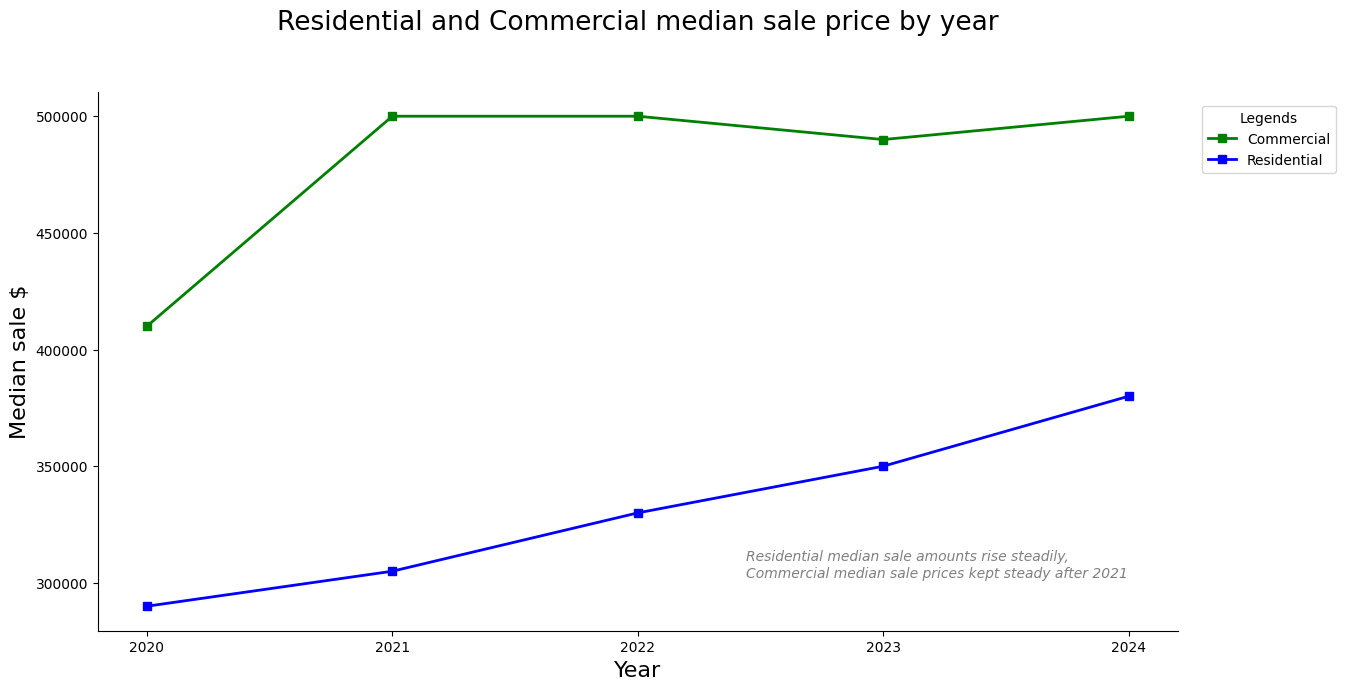

In [36]:
# median sale price by year for both property types using matplotlib
sales_medians = (
    market_analysis_df[market_analysis_df.property_type.isin(['Residential', 'Commercial'])]
    .groupby(['sale_year', 'property_type'])['sale_amount']
    .median()
    .reset_index()
)

plt.figure(figsize=(16,7))
for prop_type, group in sales_medians.groupby('property_type'):
    color = 'blue' if prop_type == 'Residential' else 'green'
    plt.plot(group['sale_year'], group['sale_amount'], marker='s', label=prop_type, color=color, linewidth=2)

text = ('Residential median sale amounts rise steadily, \n' \
'Commercial median sale prices kept steady after 2021')
plt.title("Residential and Commercial median sale price by year", fontsize=19, pad=45)
plt.xticks(sales_medians.sale_year.unique())
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Median sale $', fontsize = 16)
plt.legend(
    title='Legends',
    loc='upper left',
    bbox_to_anchor=(1.01,1),
    borderaxespad=1,
    fontsize=10
)
plt.gca().spines[['top', 'right']].set_visible(False)
#plt.grid(alpha= 0.25)
plt.text(x=0.6, y=0.1, s=text, transform=plt.gca().transAxes, style='italic', color='gray')
plt.subplots_adjust(right=0.8)
plt.show()

Now I want to see which towns have the highest and lowest median sale prices for 2024. This will highlight where housing markets are hottest and slowest

In [37]:
#top and bottom towns for median sale price (2024)
prices_by_towns = (
    market_analysis_df[(market_analysis_df.property_type.isin(['Residential','Commercial']))
                       & (market_analysis_df.sale_year == 2024)]
    .groupby(['town', 'property_type'])['sale_amount'].median().unstack()
)

top5_residential_2024 = prices_by_towns.Residential.sort_values(ascending=False)[:5]
bottom5_residential_2024 = prices_by_towns.Residential.sort_values(ascending=True)[:5]
top5_commercial_2024 = prices_by_towns.Commercial.sort_values(ascending=False)[:5]
bottom5_commercial_2024 = prices_by_towns.Commercial.sort_values(ascending=True)[:5]
print(top5_residential_2024, bottom5_residential_2024, top5_commercial_2024, bottom5_commercial_2024)

town
Greenwich     2195000.0
Westport      1700000.0
Roxbury       1220000.0
Easton         950000.0
Ridgefield     900000.0
Name: Residential, dtype: float64 town
Thomaston       250000.0
North Canaan    250000.0
Winchester      260000.0
New Britain     261000.0
Waterbury       265000.0
Name: Residential, dtype: float64 town
Windsor Locks    18660000.0
Westport          8500000.0
Beacon Falls      4250000.0
Hebron            3680000.0
New Fairfield     3316785.0
Name: Commercial, dtype: float64 town
East Lyme      50000.0
Southbury      84900.0
Brookfield    128000.0
Plymouth      160000.0
Sterling      172114.5
Name: Commercial, dtype: float64


Here I am making a custom function to show barplots of top and bottom towns. it’ll make it easier to reuse this later for both property types

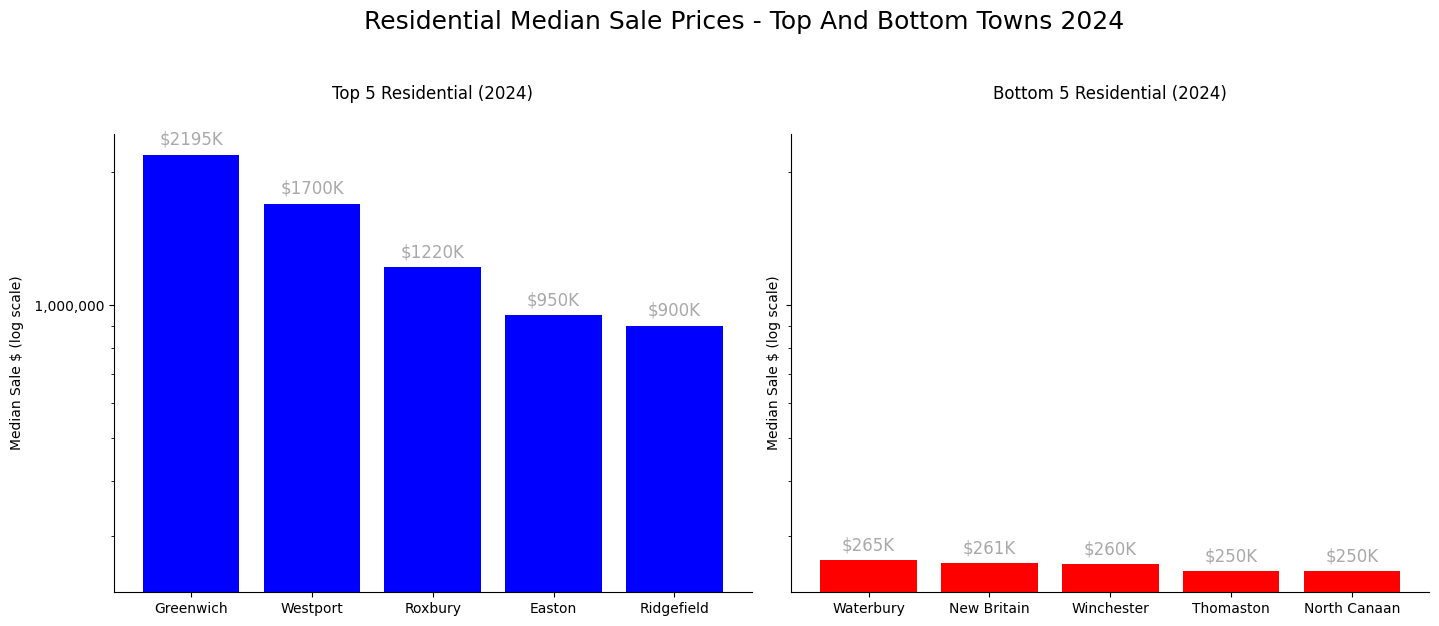

In [38]:
#function to make bar subplots for top and bottom towns
def make_bar_subplots(data1, data2, data1_color = 'blue', data2_color= 'red'):
    fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

    def single_barplot(data, axes_n, top_or_bottom = '', color = ''):
        #axes[axes_n].bar(data.index, data.values, color = color)
        #axes[axes_n].invert_yaxis()
        axes[axes_n].set_yscale('log')
        axes[axes_n].set_title(f'{top_or_bottom} 5 {data.name} (2024)', pad=25)
        axes[axes_n].set_ylabel('Median Sale $ (log scale)')
        axes[axes_n].spines[['top', 'right']].set_visible(False)

        bars = axes[axes_n].bar(data.index, data.values, color=color)
        for bar in bars:
            yval = bar.get_height()
            axes[axes_n].text(bar.get_x() + bar.get_width()/2, yval + yval*0.03,
                    f'${yval/1000:.0f}K', ha='center', va='bottom', fontsize=12, color='darkgray')


    
    single_barplot(data1, 0, 'Top', data1_color)
    single_barplot(data2.sort_values(ascending=False), 1, 'Bottom', data2_color)

    plt.suptitle(f'{data1.name} Median Sale Prices - Top And Bottom Towns 2024', fontsize=18, y=1.035)
    plt.tight_layout()

    formatter = FuncFormatter(lambda x, pos: f'{int(x): ,}')
    for ax in axes:
        ax.yaxis.set_major_formatter(formatter)
    plt.show()

make_bar_subplots(top5_residential_2024, bottom5_residential_2024, 'blue', 'red')

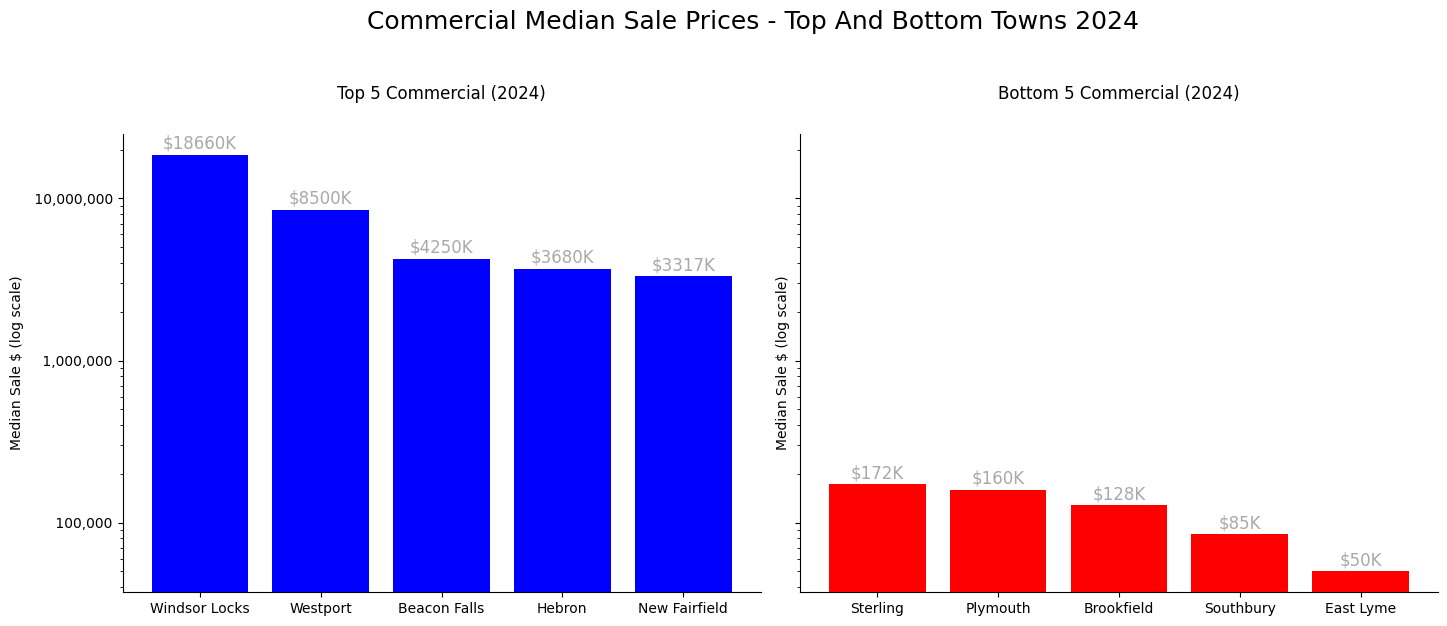

In [39]:
make_bar_subplots(top5_commercial_2024, bottom5_commercial_2024, 'blue', 'red')

Here I look at price distribution. I’ll plot histograms for residential properties to see spread and skewness

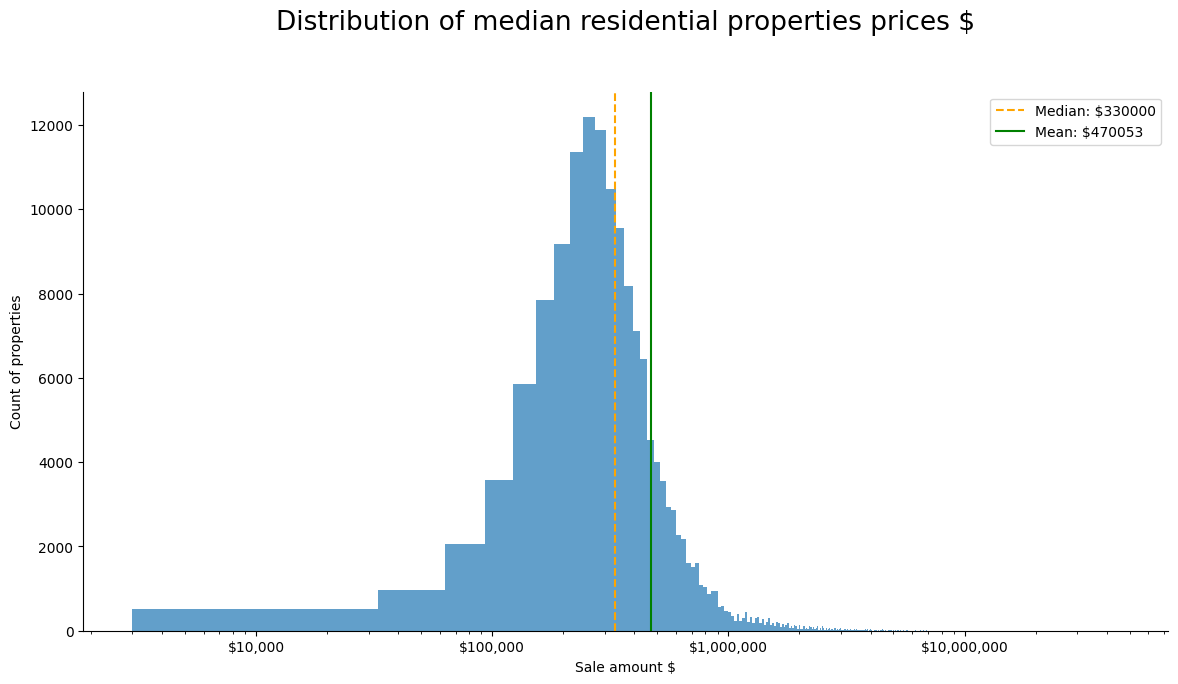

In [40]:
#
residential_sales = market_analysis_df.loc[market_analysis_df.property_type == 'Residential', 'sale_amount']

plt.figure(figsize=(14,7))
plt.hist(market_analysis_df.loc[market_analysis_df.property_type == 'Residential', 'sale_amount'], bins=1500, alpha=0.7)
plt.axvline(residential_sales.median(), color='orange', linestyle='--', label=f'Median: ${round(residential_sales.median())}')
plt.axvline(residential_sales.mean(), color='green', linestyle='-', label=f'Mean: ${round(residential_sales.mean())}')
plt.xscale('log')
plt.xlabel('Sale amount $')
plt.ylabel('Count of properties')
plt.title('Distribution of median residential properties prices $', fontsize=19, pad=45)
plt.legend()
plt.gca().spines[['top', 'right']].set_visible(False)
formatter = FuncFormatter(lambda x, pos: f'${x:,.0f}')
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()

same thing but for commercial properties — curious to see if it’s more skewed

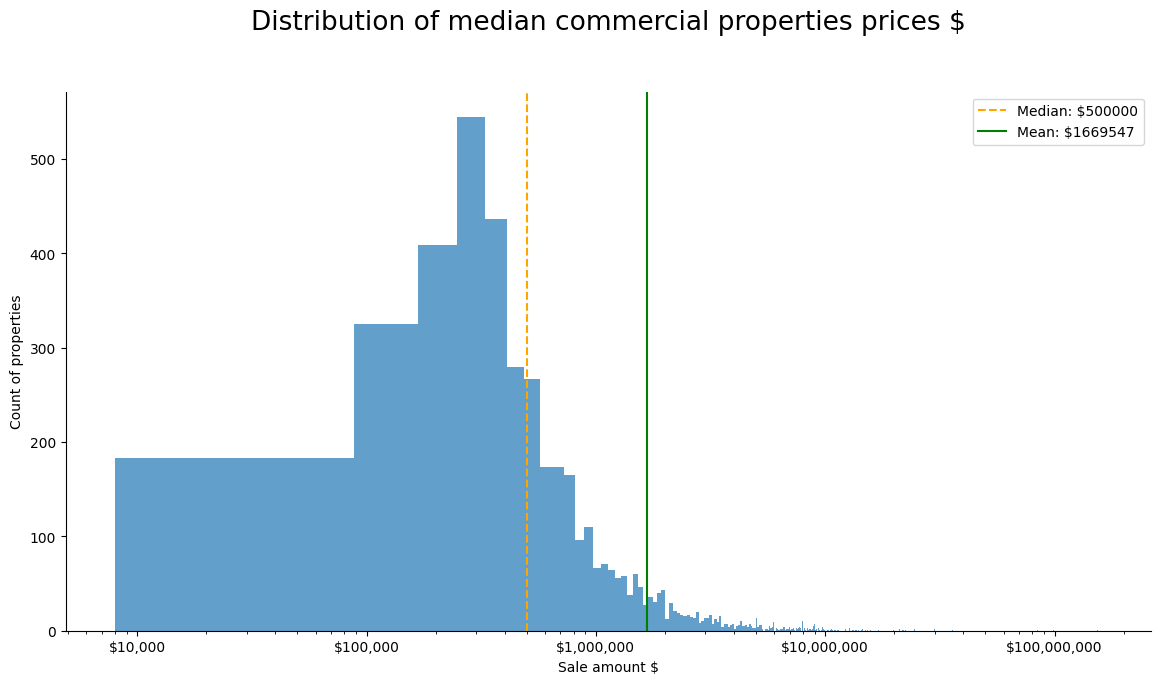

In [41]:
#histogram for commercial property sales
commercial_sales = market_analysis_df.loc[market_analysis_df.property_type == 'Commercial', 'sale_amount']

plt.figure(figsize=(14,7))
plt.hist(market_analysis_df.loc[market_analysis_df.property_type == 'Commercial', 'sale_amount'], bins=2000, alpha=0.7)
plt.axvline(commercial_sales.median(), color='orange', linestyle='--', label=f'Median: ${round(commercial_sales.median())}')
plt.axvline(commercial_sales.mean(), color='green', linestyle='-', label=f'Mean: ${round(commercial_sales.mean())}')
plt.xscale('log')
plt.xlabel('Sale amount $')
plt.ylabel('Count of properties')
plt.title('Distribution of median commercial properties prices $', fontsize = 19, pad=45)
plt.gca().spines[['top', 'right']].set_visible(False)
formatter = FuncFormatter(lambda x, pos: f'${x:,.0f}')
plt.gca().xaxis.set_major_formatter(formatter)
plt.legend()
plt.show()

## Plots in Seaborn

Here I am switching to seaborn now. It gives cleaner visuals and is faster to style. First, a lineplot version of the median sale price trend

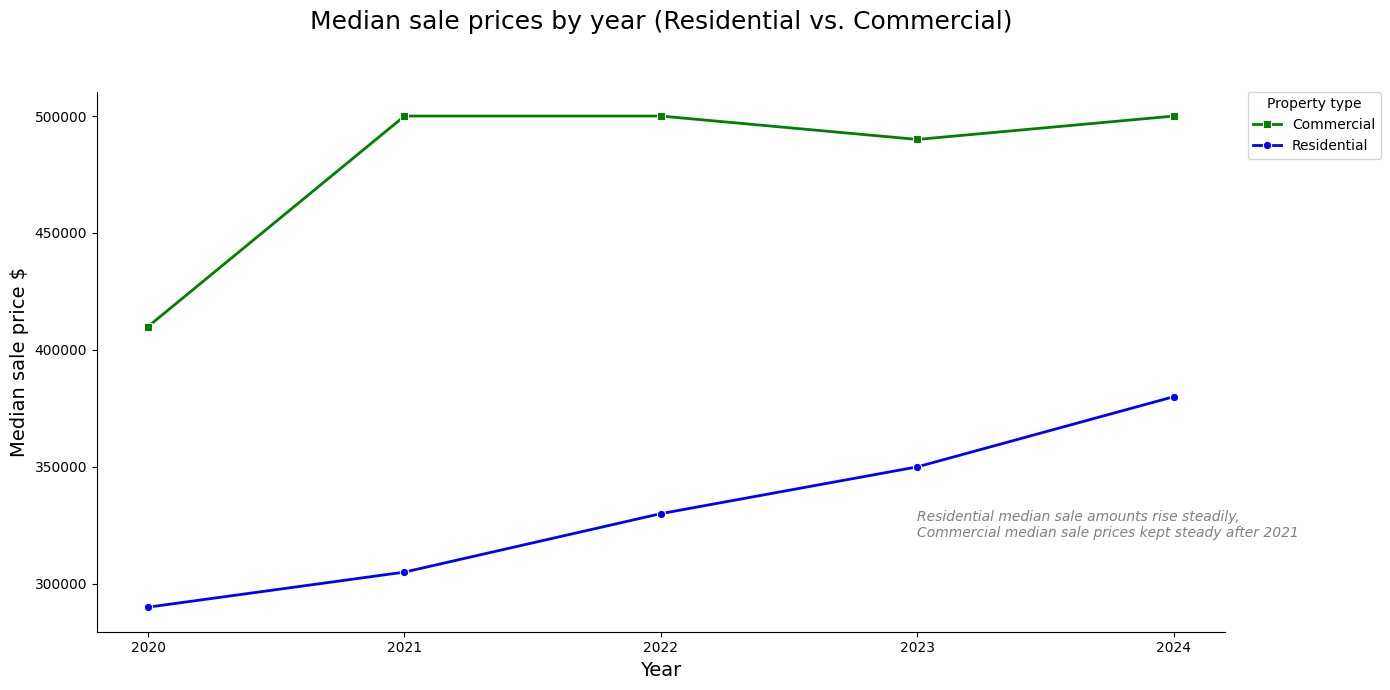

In [42]:
# seaborn lineplot version of median sale price by year
sales_medians['sale_year'] = sales_medians['sale_year'].astype(int)

plt.figure(figsize=(14,7))
sns.lineplot(
    data=sales_medians,
    x='sale_year',
    y='sale_amount',
    hue='property_type',
    
    style='property_type',
    
    markers={'Residential': 'o', 'Commercial': 's'},
    dashes=False,
    linewidth=2,
    linestyle='solid',
    palette={'Residential' : 'blue', 'Commercial': 'green'}
)

plt.title('Median sale prices by year (Residential vs. Commercial)', fontsize=18, pad=45)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Median sale price $', fontsize=14)
plt.xticks(sorted(sales_medians.sale_year.unique().astype(int)))
plt.legend(title= 'Property type', 
           loc= 'upper left',
           bbox_to_anchor=(1.02,1),
           borderaxespad=0)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.annotate(text=text,
             xy=(2022, 500000),
             xytext=(2023, 320000),
             #arrowprops=dict(facecolor='gray', arrowstyle = '->'),
             fontsize=10, color='gray', style='italic')
plt.tight_layout()
plt.show()

Seaborn barplots for top and bottom towns — using same function idea as before but more polished look

In [43]:
#seaborn barplot version for top/bottom towns
def make_sns_barplots (data1, data2, data1_color = 'blue', data2_color= 'red'):
    fig, axes = plt.subplots(1, 2, figsize=(14, 7), sharey=True)

    def single_barplot(data, axes_n, top_or_bottom = '', color = ''):
        sns.barplot(
            x = data.index,
            y = data.values,
            color=color,
            ax=axes[axes_n]
        )
        axes[axes_n].set_yscale('log')
        axes[axes_n].set_title(f'{top_or_bottom} 5 {data.name} Towns 2024', pad=20)
        axes[axes_n].tick_params(axis='x')
        axes[axes_n].set_ylabel('Median Sale $ (log scale)')
        axes[axes_n].spines[['top', 'right']].set_visible(False)

        bars = axes[axes_n].bar(data.index, data.values, color=color)
        for bar in bars:
            yval = bar.get_height()
            axes[axes_n].text(bar.get_x() + bar.get_width()/2, yval + yval*0.03,
                    f'${yval/1000:.0f}K', ha='center', va='bottom', fontsize=12, color='darkgray')

    single_barplot(data1, 0, 'Top', data1_color)
    single_barplot(data2.sort_values(ascending=False), 1, 'Bottom', data2_color)

    plt.suptitle(f'{data1.name} Median Sale Prices - Top And Bottom Towns 2024', fontsize=18, y=1.035)
    plt.tight_layout()

    formatter = FuncFormatter(lambda x, pos: f'{int(x): ,}')
    for ax in axes:
        ax.yaxis.set_major_formatter(formatter)
    plt.show()

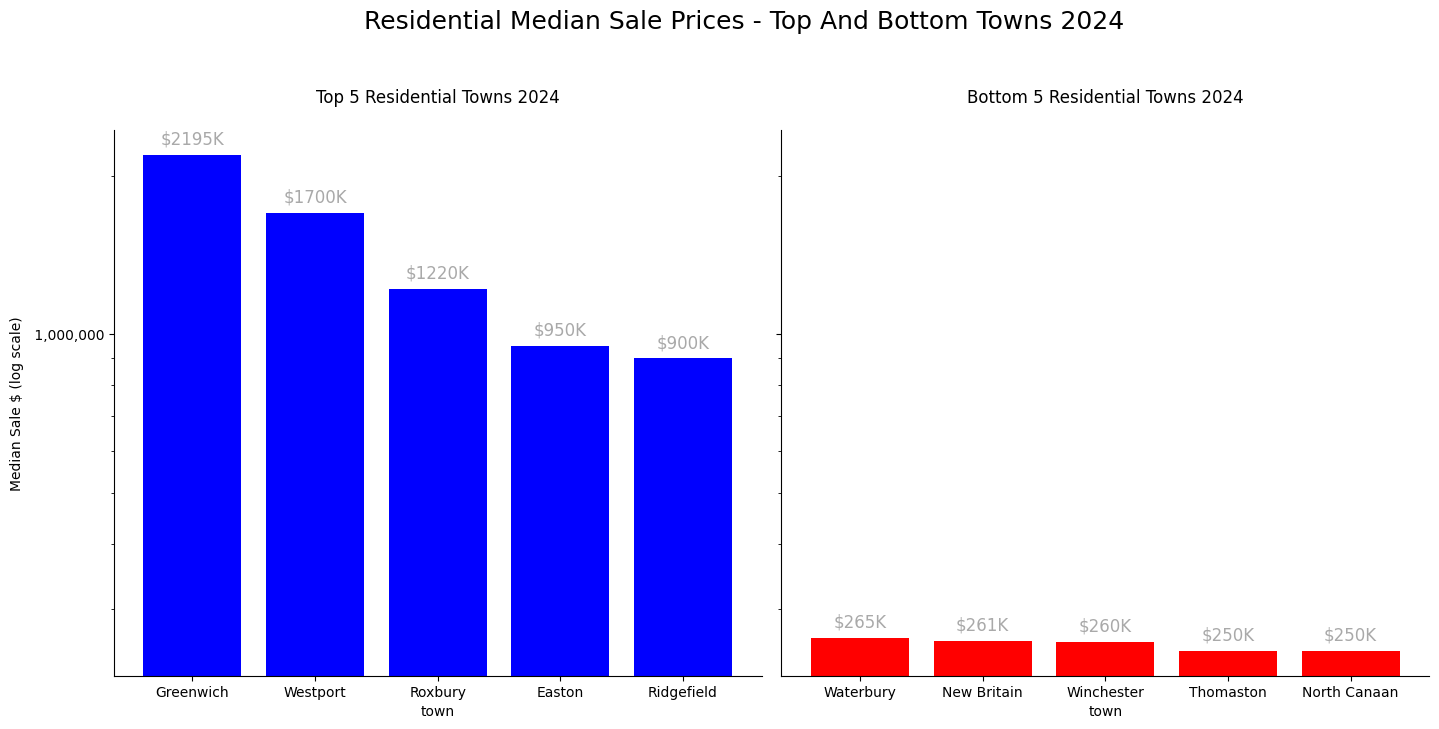

In [44]:
make_sns_barplots(top5_residential_2024, bottom5_residential_2024)

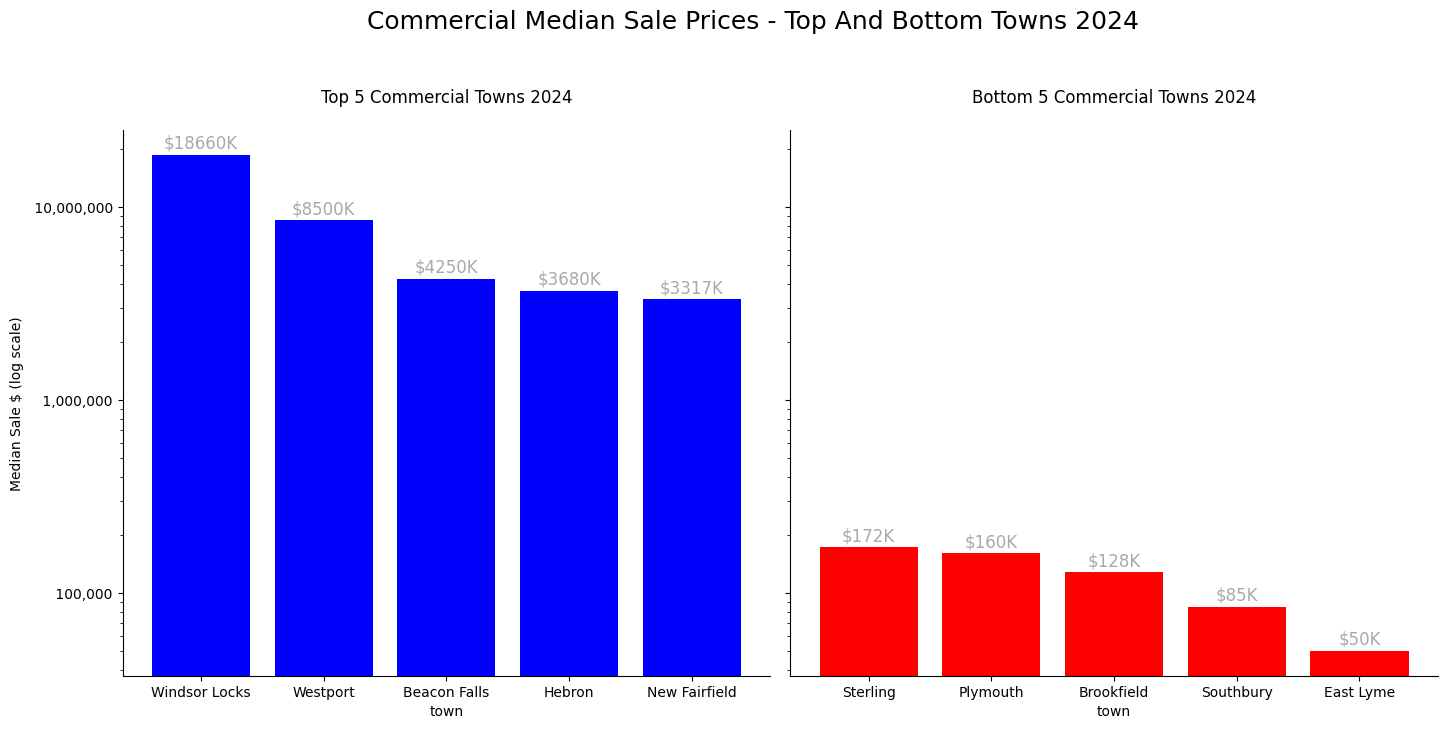

In [45]:
make_sns_barplots(top5_commercial_2024, bottom5_commercial_2024)

Now histograms in seaborn — they’re smoother and better looking. First for residential properties

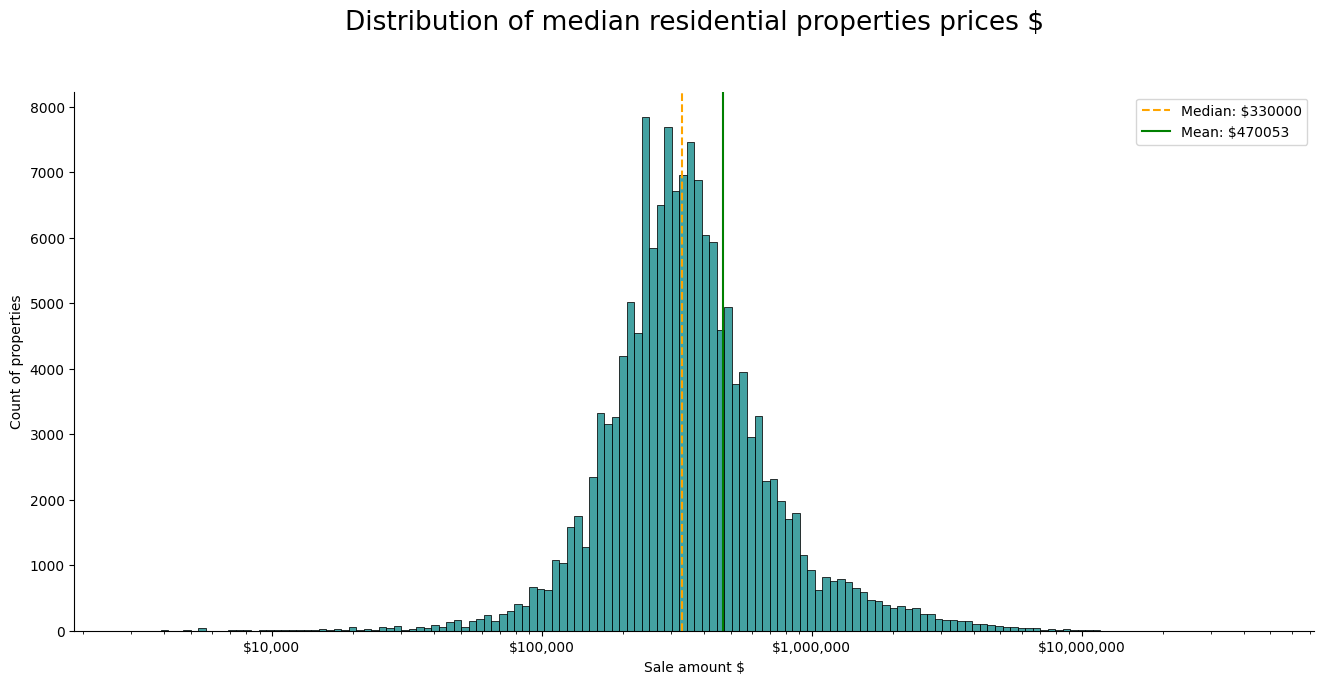

In [46]:
## seaborn histograms for residential prices
residential_sales = market_analysis_df.loc[market_analysis_df.property_type == 'Residential', 'sale_amount']

plt.figure(figsize=(16,7))

sns.histplot(
    data=market_analysis_df[market_analysis_df.property_type == 'Residential'],
    x='sale_amount',
    bins=150,
    log_scale=True,
    color="#058383"
)

plt.axvline(residential_sales.median(), color='orange', linestyle='--', label=f'Median: ${round(residential_sales.median())}')
plt.axvline(residential_sales.mean(), color='green', linestyle='-', label=f'Mean: ${round(residential_sales.mean())}')
#plt.xscale('log')
plt.xlabel('Sale amount $')
plt.ylabel('Count of properties')
plt.title('Distribution of median residential properties prices $', fontsize=19, pad=45)
plt.legend()
plt.gca().spines[['top', 'right']].set_visible(False)
formatter = FuncFormatter(lambda x, pos: f'${x:,.0f}')
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()

And here’s the same for commercial sales. Just comparing shapes and scales

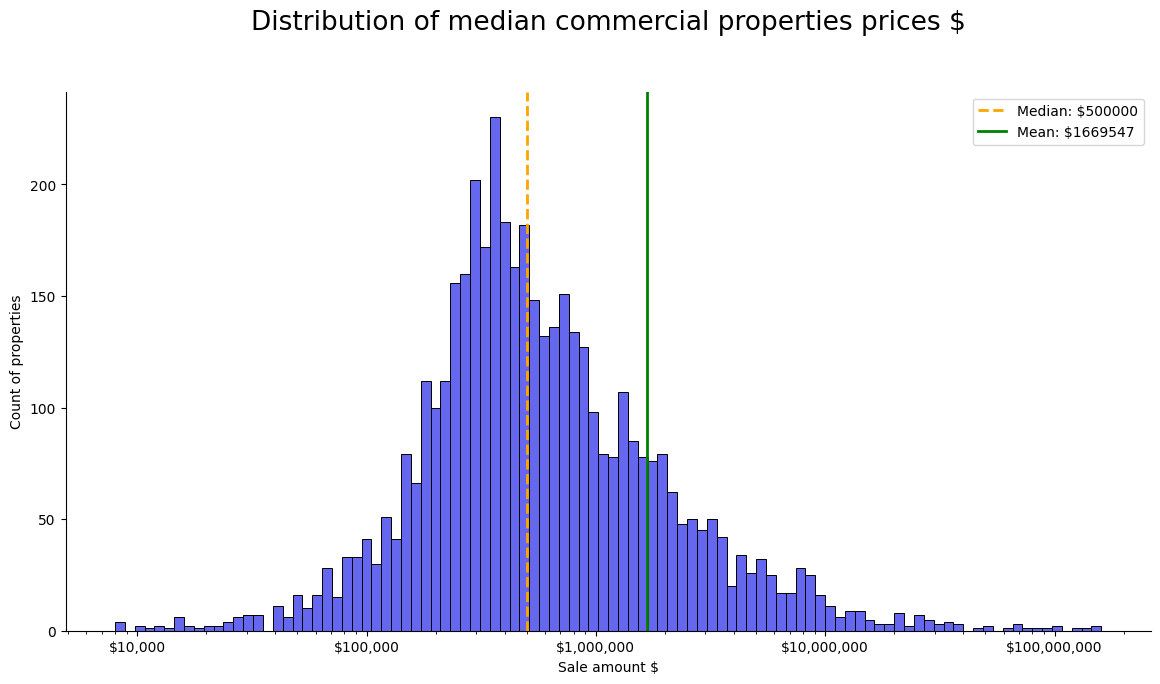

In [47]:
# seaborn histograms for commercial property prices
commercial_sales = market_analysis_df.loc[market_analysis_df.property_type == 'Commercial', 'sale_amount']

plt.figure(figsize=(14,7))

sns.histplot(
    data=market_analysis_df[market_analysis_df.property_type == 'Commercial'],
    x='sale_amount',
    bins=100,
    log_scale=True,
    color="#3235ea"
)
plt.axvline(commercial_sales.median(), color='orange', linestyle='--', linewidth=2, label=f'Median: ${round(commercial_sales.median())}')
plt.axvline(commercial_sales.mean(), color='green', linestyle='-', linewidth=2,label=f'Mean: ${round(commercial_sales.mean())}')
plt.xscale('log')
plt.xlabel('Sale amount $')
plt.ylabel('Count of properties')
plt.title('Distribution of median commercial properties prices $', fontsize = 19, pad=45)
plt.gca().spines[['top', 'right']].set_visible(False)
formatter = FuncFormatter(lambda x, pos: f'${x:,.0f}')
plt.gca().xaxis.set_major_formatter(formatter)
plt.legend()
plt.show()

Here is the scatterplot showing relationship between assessed and sold prices. Using log scales to handle huge range

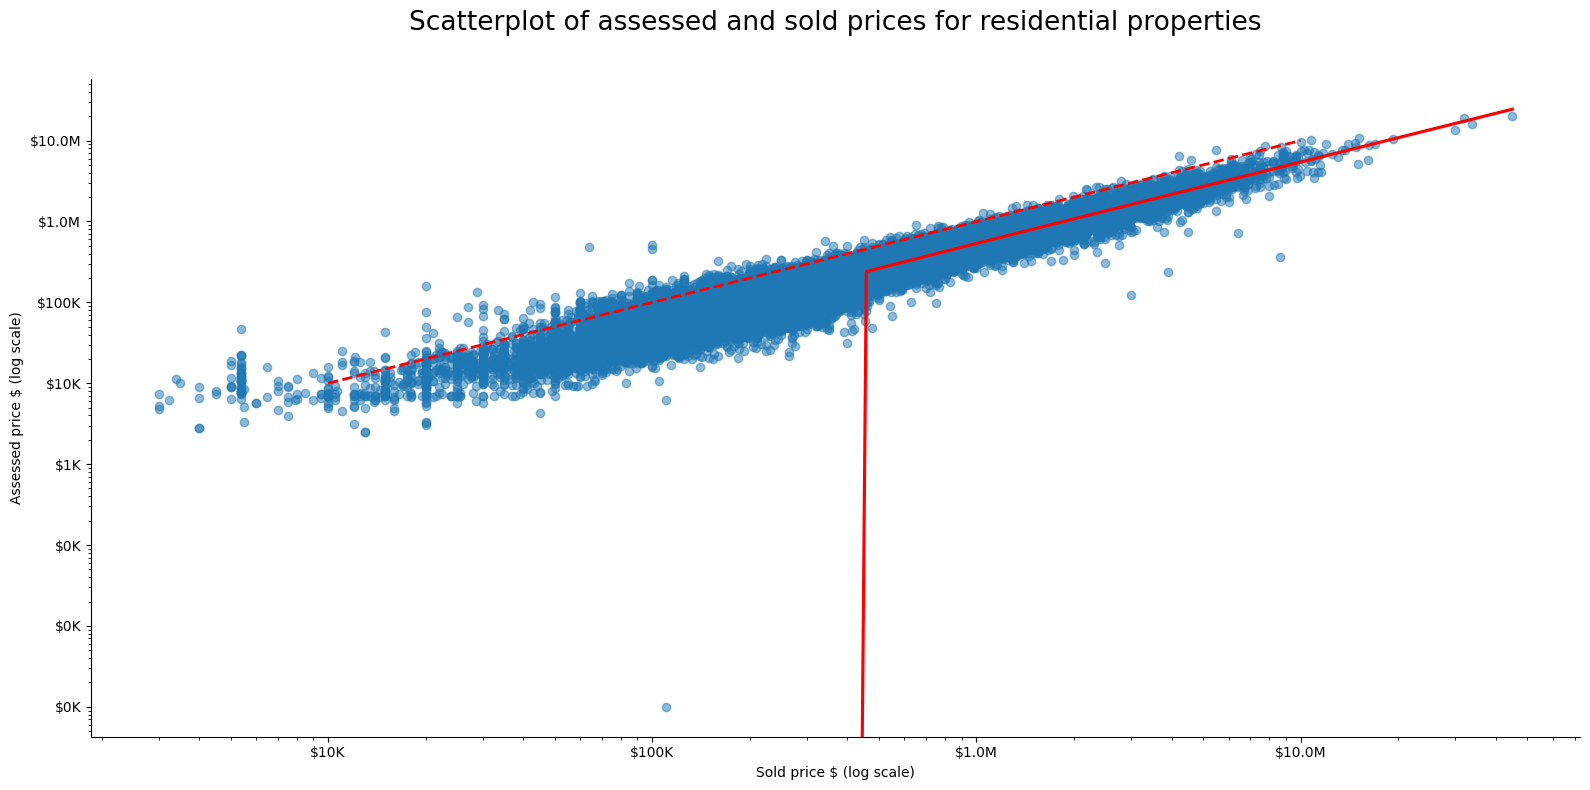

In [48]:
# seaborn scatterplot showing relationship between assessed and sold prices
plt.figure(figsize=(16, 8))
sns.regplot(
    data=market_analysis_df[market_analysis_df.property_type == 'Residential'],
    x='sale_amount',
    y='assessed_value',
    scatter_kws={'alpha':0.5},
    line_kws={'color':'red'},
   
    #log_scale=True
)

plt.plot([1e4, 1e7], [1e4, 1e7], color='red', linestyle='--', linewidth=2, label='1:1 Line')
plt.xscale('log')
plt.yscale('log')
plt.title('Scatterplot of assessed and sold prices for residential properties', fontsize=19, pad=35)
plt.xlabel('Sold price $ (log scale)')
plt.ylabel('Assessed price $ (log scale)')
formatter = FuncFormatter(lambda x, _: f'${x/1_000:.0f}K' if x < 1_000_000 else f'${x/1_000_000:.1f}M')
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  

* Residential prices kept growing while commercial ones flattened. 
* Most homes sell higher than assessed, showing strong market trend
* Distrubition of residential prices is normal, while distribution of commercial prices is slightly right skewed and has some heavy outliers indicating that there are some really expensive commercial properties were sold.
* It is much easier to create plots in a few lines with Seaborn, while matplotlib requires more coding. But both combined could deliver really good plots - seaoborn to create plots, matplotlib to use for 'cosmetic' adjustments.